In [4]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# Phân tích đa biến trên 2 nguồn dữ liệu: 
# Tìm 10 sản phẩm bán được nhiều nhất

# 0. Load dữ liệu

In [5]:
# Header: order_id,product_id,add_to_cart_order,reordered
csv_data = np.genfromtxt('instacart-data/order_products__train.csv', skip_header=1, 
                         delimiter=',', dtype=int)
print("Đã load xong!")
print(csv_data.shape)

Đã load xong!
(1384617, 4)


In [13]:
print(csv_data.shape)
print(csv_data.T[-1])

(1384617, 4)
[1 1 0 ... 1 1 1]


In [14]:
np.count_nonzero(np.isnan(csv_data))

0

# 1. Phân tích mô tả
(đơn biến, không dùng đồ thị)

**Phân tích theo số lượng order**
(Mỗi order có bao nhiêu products?)

In [6]:
orders = csv_data.T[0]
vals, count = np.unique(orders, return_counts=True)
print(vals)
print(count)
print(vals.size)

[      1      36      38 ... 3421058 3421063 3421070]
[8 8 9 ... 8 4 3]
131209


In [7]:
print(np.mean(count))
print(np.median(count))

10.552759338155157
9.0


**Phân tích theo product_id**
(Mỗi product được order bao nhiêu lần?)

In [24]:
product_id = csv_data.T[1]
vals, count = np.unique(product_id, return_counts=True)
print(vals)
print(count)
print(vals.size)

[    1     2     3 ... 49686 49687 49688]
[76  4  6 ...  7  1  4]
39123


In [27]:
print(np.mean(count))   # Trung bình mỗi product xuất hiện bao nhiêu lần
print(np.median(count)) # Median của số lần products xuất hiện
print(np.max(count))    # Mode của số lần products được mua nhiều nhất
print(vals[np.argmax(count)]) # Id của product được mua nhiều nhất

35.39138102906219
5.0
18726
24852


**Phân tích theo reordered**
(Mỗi product đã được reorder bao nhiêu lần?)

In [23]:
reorders = csv_data.T[3]
reorder_product_id = product_id[reorders == 1]
print(reorder_product_id.size)

828824


In [24]:
vals, count = np.unique(reorder_product_id, return_counts=True)
print(vals)
print(count)
print(vals.size)

[    1     2     3 ... 49683 49686 49688]
[  49    1    6 ... 1709    5    1]
30176


In [31]:
print(np.mean(count))   # Trung bình mỗi product được reordered bao nhiêu lần
print(np.median(count)) # Median của số lần products được reordered
print(np.max(count))    # Mode của số lần products được reordered nhiều nhất
print(vals[np.argmax(count)]) # Id của product được reordered nhiều nhất

27.466330858960763
4.0
16557
24852


# 2. Phân tích theo các câu hỏi

## 2.1) Khách hàng thường mua bao nhiêu sản phẩm trong một đơn hàng?
Vẽ biểu đồ phân bố số sản phẩm trong đơn hàng

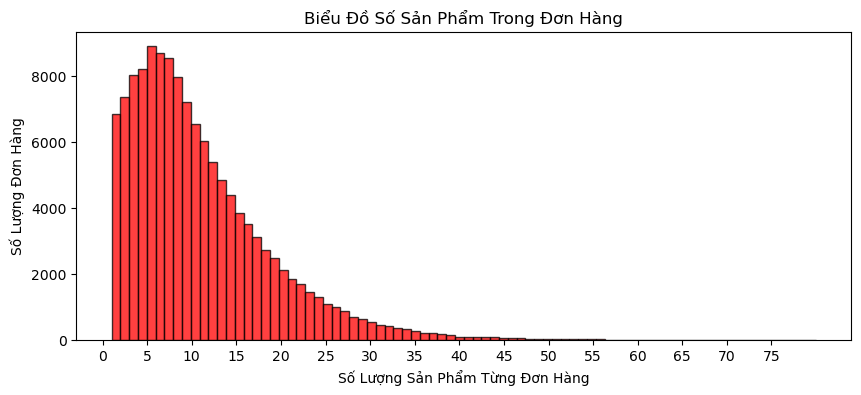

In [36]:
vals, count = np.unique(orders, return_counts=True)
plt.figure(figsize = (10,4))
n, bins, edges = plt.hist(count, alpha=0.75, bins=80,
                          color='red', edgecolor='black', linewidth=1.0)
plt.title('Biểu Đồ Số Sản Phẩm Trong Đơn Hàng')
plt.xlabel('Số Lượng Sản Phẩm Từng Đơn Hàng')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(0,80,5))
plt.show()

**Câu hỏi luyện tập: Hãy vẽ đường mean, median, mode**

## 2.2) Những sản phẩm nào bán chạy nhất?
### 2.2.1) Vẽ biểu đồ 10 sản phẩm bán chạy nhất

In [8]:
product_id = csv_data.T[1]
vals, count = np.unique(product_id, return_counts=True)
sorted_count_index = np.lexsort([vals, count])[::-1][0:10]
print(sorted_count_index)
print(count[sorted_count_index])
print(vals[sorted_count_index])

[19574 10367 16685 17300 37499 37609 37164 13228 20648 22024]
[18726 15480 10894  9784  8135  7409  7293  6494  6033  5546]
[24852 13176 21137 21903 47626 47766 47209 16797 26209 27966]


In [9]:
top10_product_id = vals[sorted_count_index]
top10_product_count = count[sorted_count_index]

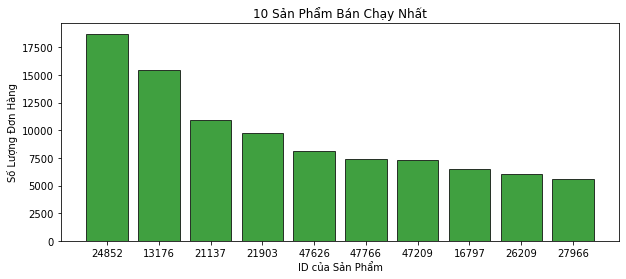

In [10]:
plt.figure(figsize = (10,4))
plt.bar(x=range(10), height=top10_product_count, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Bán Chạy Nhất')
plt.xlabel('ID của Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_product_id, rotation='horizontal')
plt.show()

### 2.2.2) Cần lấy thông tin về tên của sản phẩm thay vì id

**Thử load file products.csv bằng genfromtxt**

In [ ]:
# Header: product_id,product_name,aisle_id,department_id
# pro_data = np.loadtxt('data/products.csv', skiprows=1, delimiter=',', dtype=np.object)
pro_data = np.genfromtxt('instacart-data/products.csv', skip_header=1, delimiter=',', dtype=np.object)

**Load bằng cách đọc thông thường**

In [18]:
import csv
file_path = 'instacart-data/products.csv'
ds_product_id = []
ds_product_name = []
ds_aisle_id = []
with open(file_path, newline='', encoding='utf-8') as csv_file:
    data_csv = csv.reader(csv_file, delimiter=',')
    header = next(data_csv)
    print(header)

    for row in data_csv:
        ds_product_id.append(int(row[0]))
        ds_product_name.append(row[1])
        ds_aisle_id.append(int(row[2]))
print(ds_product_name[0:10])
print(ds_product_id[0:10])
print(ds_aisle_id[0:10])

['product_id', 'product_name', 'aisle_id', 'department_id']
['Chocolate Sandwich Cookies', 'All-Seasons Salt', 'Robust Golden Unsweetened Oolong Tea', 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce', 'Green Chile Anytime Sauce', 'Dry Nose Oil', 'Pure Coconut Water With Orange', "Cut Russet Potatoes Steam N' Mash", 'Light Strawberry Blueberry Yogurt', 'Sparkling Orange Juice & Prickly Pear Beverage']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[61, 104, 94, 38, 5, 11, 98, 116, 120, 115]


In [20]:
print(top10_product_id)
# print(top10_product_count)
top10_product_index = [ds_product_id.index(pro_id) for pro_id in top10_product_id]
print(top10_product_index)
top10_product_name = [ds_product_name[pro_idx] for pro_idx in top10_product_index]
print(top10_product_name)

[24852 13176 21137 21903 47626 47766 47209 16797 26209 27966]
[24851, 13175, 21136, 21902, 47625, 47765, 47208, 16796, 26208, 27965]
['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Large Lemon', 'Organic Avocado', 'Organic Hass Avocado', 'Strawberries', 'Limes', 'Organic Raspberries']


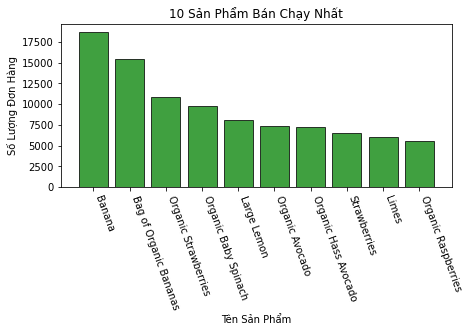

In [21]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_product_count, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Bán Chạy Nhất')
plt.xlabel('Tên Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_product_name, rotation=-70, ha='left')
plt.show()

## 2.4. Những sản phẩm nào thường được re-ordered nhiều nhất?
Vẽ biểu đồ 10 loại sản phẩm được re-ordered nhiều nhất

In [25]:
vals, count = np.unique(reorder_product_id, return_counts=True)
sorted_count_index = np.argsort(count)[::-1][0:10]
print(sorted_count_index)
print(count[sorted_count_index])
print(vals[sorted_count_index])

[15092  7956 12863 13349 29007 28659 28919 10192 16943 15902]
[16557 13362  8603  8055  6226  6042  5923  4786  4279  4234]
[24852 13176 21137 21903 47766 47209 47626 16797 27966 26209]


In [26]:
top10_reorderPro_id = vals[sorted_count_index]
top10_reorderPro_count = count[sorted_count_index]

In [27]:
top10_reorderPro_index = [ds_product_id.index(pro_id) for pro_id in top10_reorderPro_id]
print(top10_reorderPro_index)
top10_reorderPro_name = [ds_product_name[pro_idx] for pro_idx in top10_reorderPro_index]
print(top10_reorderPro_name)

[24851, 13175, 21136, 21902, 47765, 47208, 47625, 16796, 27965, 26208]
['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Avocado', 'Organic Hass Avocado', 'Large Lemon', 'Strawberries', 'Organic Raspberries', 'Limes']


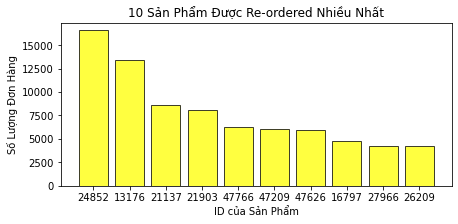

In [28]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_reorderPro_count, 
        color='yellow', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Được Re-ordered Nhiều Nhất')
plt.xlabel('ID của Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_reorderPro_id, rotation='horizontal')
plt.show()

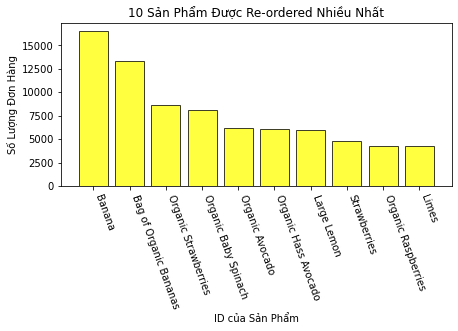

In [29]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_reorderPro_count, 
        color='yellow', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Được Re-ordered Nhiều Nhất')
plt.xlabel('ID của Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_reorderPro_name, rotation=-70, ha='left')
plt.show()